MultiRAT analysis code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

# Foreword

This is a R markdown file which contains all the code for reproducing my
analysis. The code is meant to be followed step-wise. The raw fMRI
dataset will not be publicly available before the project preprint
publication on BioArxiv. The raw fMRI dataset can be made available
prior to publication upon request and review from the authors.

If re-using some of the scripts, please follow citations guidelines for
the software used. I’ve provided the links to the software wherever
possible. See also the [license](../LICENSE.md) for this software.


In [3]:
# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'

In [81]:
import os
import glob
import pandas as pd
import numpy as np

df = pd.read_csv('../assets/table/meta_data_20210411.tsv', sep='\t')

In [122]:
# create emty columns for the different SBA parameters.
df['aromas_CPu_CPu'] = np.nan
df['aromas_MOp_MOp'] = np.nan
df['aromas_S1bf_S1bf'] = np.nan
df['aromas_S1bf_ACA'] = np.nan


In [123]:
seed_txt_list = glob.glob((os.path.join(analysis_folder, 'scratch', 'seed_txt','aromas'))+'/*')


In [124]:
for i in seed_txt_list:
    #print(i)
    fc=pd.read_csv(i, delim_whitespace=True, header=None)
    i=i.replace('_RAS','')
    sub=int(os.path.basename(i).split('_')[0].split('-')[1])
    ses=int(os.path.basename(i).split('_')[1].split('-')[1])
    denoise=i.split('/')[6]
    seed=os.path.basename(i).split('_')[7]
    roi=os.path.basename(i).split('_')[11]
    df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100100_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100100_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100100_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100100_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100101_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100101_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100101_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100105_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100105_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100106_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100106_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100106_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100106_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100107_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100200_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100200_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100200_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100200_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100200_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100201_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100201_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100201_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100202_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100202_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100203_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100203_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100203_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100203_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100203_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100203_ses-2_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100206_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100206_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100206_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100207_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100207_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100207_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100207_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100208_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100306_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100306_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100306_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100306_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100306_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100306_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100307_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100307_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100309_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100309_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100309_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100309_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100400_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100400_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100400_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100400_ses-1_run

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100405_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100406_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100406_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100406_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100406_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100407_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100407_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100502_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100502_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100502_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100502_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100503_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100503_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100503_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100503_ses-1_run-1_bold_comb

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100508_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100509_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100509_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100509_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100509_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100600_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100600_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100600_ses-2_run-1_bold_

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100605_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100605_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100605_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100605_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100605_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100606_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100606_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100606_ses-1_run-1_bold_combi

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100608_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100609_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100609_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100609_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100609_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100800_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100800_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100800_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100803_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100804_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100804_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100804_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100805_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100805_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100805_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100806_ses-1_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100903_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100904_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100904_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100904_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100905_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100905_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100905_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0100906_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101003_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101003_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101003_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101003_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101004_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101004_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101005_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101005_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101102_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101103_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101104_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101104_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101105_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101105_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101105_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101106_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101203_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101203_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101203_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101204_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101204_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101204_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101205_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101205_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101300_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101301_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101301_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101301_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101302_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101302_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101302_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101302_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101307_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101308_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101308_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101308_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101308_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101309_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101309_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101309_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101408_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101408_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101409_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101409_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101409_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101409_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101500_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101500_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101503_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101503_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101503_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101504_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101504_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101504_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101504_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101505_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101509_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101509_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101600_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101601_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101601_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101601_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101602_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101602_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101604_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101605_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101605_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101605_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101606_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101606_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101607_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101607_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101609_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101700_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101700_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101700_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101700_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101700_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101700_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101701_ses-1_ru

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101702_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101702_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101702_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101702_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101702_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101703_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101703_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101703_ses-1_ru

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101705_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101705_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101705_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101706_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101706_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101706_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101706_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101706_ses

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101709_ses-1_run-1_bold_RAS_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101709_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101709_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101709_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101709_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101709_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101709_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101800_ses-

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101806_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101807_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101807_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101807_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101808_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101808_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101809_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101809_ses-2_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101904_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101905_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101905_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101905_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101905_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101906_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101906_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0101906_ses-1_run-1_bold_comb

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102102_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102102_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102102_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102102_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102102_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102103_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102103_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102103_ses-2_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102107_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102108_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102108_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102108_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102109_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102201_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102201_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102202_ses-1_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102206_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102206_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102206_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102207_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102207_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102207_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102208_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102209_ses-1_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102306_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102307_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102307_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102307_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102307_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102308_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102308_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102308_ses-1_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102403_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102404_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102404_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102404_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102404_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102405_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102405_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102405_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102500_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102501_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102501_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102501_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102502_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102502_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102503_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102503_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102601_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102601_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102601_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102602_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102602_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102602_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102602_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102602_ses-2_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102700_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102701_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102701_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102701_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102701_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102702_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102702_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102702_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102705_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102706_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102706_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102706_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102706_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102707_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102707_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102707_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102800_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102801_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102801_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102802_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102802_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102802_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102803_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102803_ses-1_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102808_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102809_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102809_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102900_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102900_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102900_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102901_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102901_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102905_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102905_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102905_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102906_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102906_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102906_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102906_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0102907_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103001_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103001_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103001_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103001_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103002_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103002_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103002_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103002_ses-1_run-1_bold_comb

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103006_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103006_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103006_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103006_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103007_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103007_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103007_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103007_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103100_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103100_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103100_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103101_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103101_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103101_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103101_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103101_ses-2_run-1_bold_combin

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103103_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103104_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103104_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103104_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103104_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103104_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103104_ses-2_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103105_ses-1_run-1_bold_comb

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103107_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103108_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103108_ses-2_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103108_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103108_ses-2_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103109_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103109_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103109_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103206_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103206_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103207_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103209_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103209_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103301_ses-1_run-1_bold_RAS_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103302_ses-1_run-1_bold_RAS_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103302_ses-1_run-1_bo

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103404_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103404_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103405_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103406_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103406_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103407_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103407_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103407_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103503_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103503_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103503_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103504_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103504_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103504_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103504_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103505_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103508_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103508_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103508_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103600_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103600_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103600_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103601_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103601_ses-1_run-1_bold_com

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103603_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103603_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103604_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103604_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103604_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103604_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103605_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103606_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103606_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103607_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103607_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103608_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103608_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103608_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103608_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103609_ses-1_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103700_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103700_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103701_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103701_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103701_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103701_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103702_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103702_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103706_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103706_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103706_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103707_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103707_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103707_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103707_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103708_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103800_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103800_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103801_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103801_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103801_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103802_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103802_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103802_ses-1_run-1_bold_combi

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103804_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103805_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103805_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103806_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103806_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103806_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103806_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103807_ses-1_run-1_bold_c

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103900_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103900_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103900_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103901_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103901_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103901_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103902_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103902_ses-1_run-1_bold_combi

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103906_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103906_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103907_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103908_ses-1_run-1_bold_combined_aroma_cleaned_CPu_l_corr_map_CPu_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103908_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103908_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103908_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0103909_ses-1_run-1_bold_co

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed


/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104003_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104003_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104003_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104004_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104004_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_S1bf_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104005_ses-1_run-1_bold_combined_aroma_cleaned_S1bf_l_corr_map_ACA_l.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104006_ses-1_run-1_bold_combined_aroma_cleaned_MOp_l_corr_map_MOp_r.txt
/project/4180000.19/multiRat/scratch/seed_txt/aromas/sub-0104006_ses-1_run-1_bold_

<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc[0][0]
<ipython-input-124-be50a69a6293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(denoise+'_'+seed

In [181]:
#remove excluded scans
df_exclude = df.loc[(df['exclude'] != 'yes')]

/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

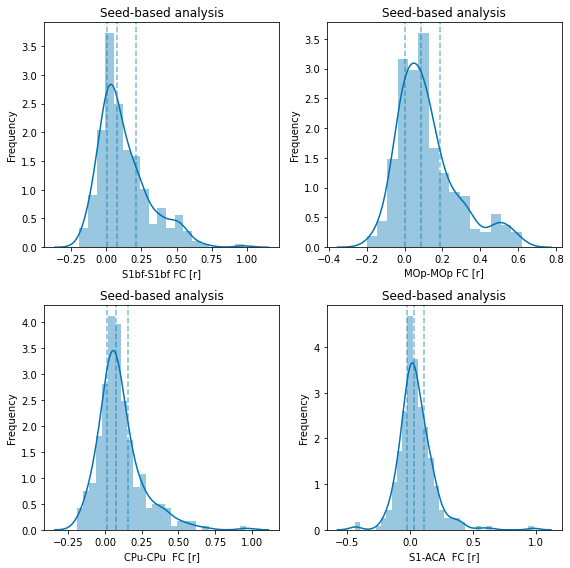

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
sns.set_palette("colorblind")

ax1 = sns.distplot(df_exclude['aromas_S1bf_S1bf'],ax=axes[0,0])
ax2 = sns.distplot(df_exclude['aromas_MOp_MOp'],ax=axes[0,1])
ax3 = sns.distplot(df_exclude['aromas_CPu_CPu'],ax=axes[1,0])
ax4 = sns.distplot(df_exclude['aromas_S1bf_ACA'],ax=axes[1,1])

ax1.set(xlabel='S1bf-S1bf FC [r]', ylabel='Frequency', title='Seed-based analysis')
ax2.set(xlabel='MOp-MOp FC [r]', ylabel='Frequency', title='Seed-based analysis')
ax3.set(xlabel='CPu-CPu  FC [r]', ylabel='Frequency', title='Seed-based analysis')
ax4.set(xlabel='S1-ACA  FC [r]', ylabel='Frequency', title='Seed-based analysis')

ax1.axvline(df_exclude['aromas_S1bf_S1bf'].quantile(0.25),ls='--',alpha=0.5)
ax1.axvline(df_exclude['aromas_S1bf_S1bf'].quantile(0.50),ls='--',alpha=0.5)
ax1.axvline(df_exclude['aromas_S1bf_S1bf'].quantile(0.75),ls='--',alpha=0.5)

ax2.axvline(df_exclude['aromas_MOp_MOp'].quantile(0.25),ls='--',alpha=0.5)
ax2.axvline(df_exclude['aromas_MOp_MOp'].quantile(0.50),ls='--',alpha=0.5)
ax2.axvline(df_exclude['aromas_MOp_MOp'].quantile(0.75),ls='--',alpha=0.5)


ax3.axvline(df_exclude['aromas_CPu_CPu'].quantile(0.25),ls='--',alpha=0.5)
ax3.axvline(df_exclude['aromas_CPu_CPu'].quantile(0.50),ls='--',alpha=0.5)
ax3.axvline(df_exclude['aromas_CPu_CPu'].quantile(0.75),ls='--',alpha=0.5)

ax4.axvline(df_exclude['aromas_S1bf_ACA'].quantile(0.25),ls='--',alpha=0.5)
ax4.axvline(df_exclude['aromas_S1bf_ACA'].quantile(0.50),ls='--',alpha=0.5)
ax4.axvline(df_exclude['aromas_S1bf_ACA'].quantile(0.75),ls='--',alpha=0.5)


plt.tight_layout()

In [170]:
#extracting quartiles for the functional connectivity parameters
df_exclude[['aromas_S1bf_S1bf','aromas_MOp_MOp','aromas_CPu_CPu','aromas_S1bf_ACA']].quantile([0.25,0.5,0.75])

,aromas_S1bf_S1bf,aromas_MOp_MOp,aromas_CPu_CPu,aromas_S1bf_ACA
0.25,0.003668,0.002189,0.014247,-0.025802
0.50,0.077933,0.088585,0.073023,0.032751
0.75,0.215066,0.186073,0.158786,0.111633


/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


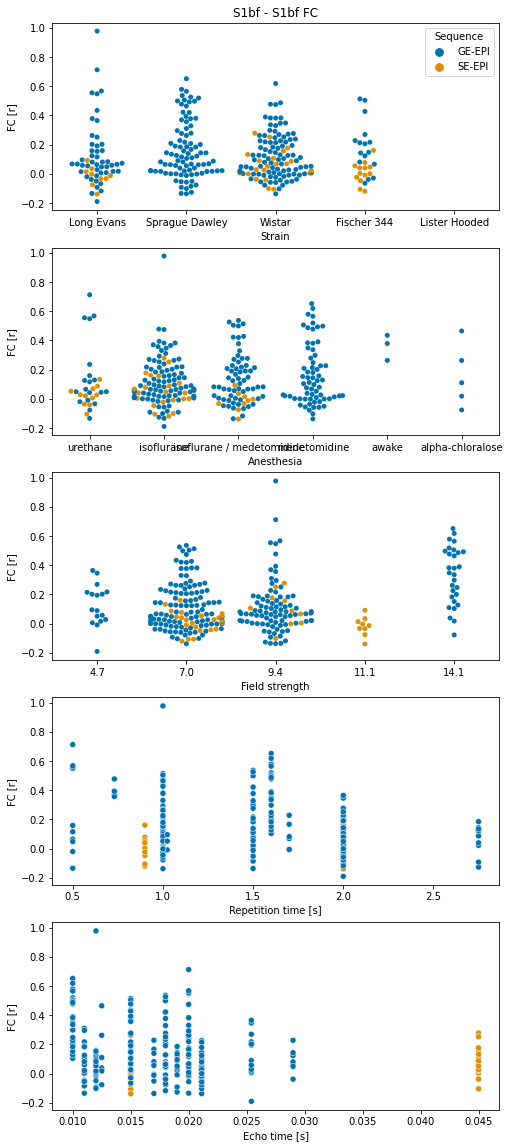

In [177]:
#plotting as a function of different parameters

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(8, 20))

sns.set_palette("colorblind")
df_exclude = df.loc[(df['exclude'] != 'yes')]

ax0 = sns.swarmplot(data=df_exclude, x="rat.strain",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[0])
ax1 = sns.swarmplot(data=df_exclude, x="anesthesia.maintenance",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[1])
ax2 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[2])
ax3 = sns.scatterplot(data=df_exclude, x="func.TR",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[3])
ax4 = sns.scatterplot(data=df_exclude, x="func.TE",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[4])

ax0.set(xlabel='Strain', ylabel='FC [r]', title='S1bf - S1bf FC')
ax0.get_legend().set_title('Sequence')

ax1.set(xlabel='Anesthesia', ylabel='FC [r]')
ax1.get_legend().remove()

ax2.set(xlabel='Field strength', ylabel='FC [r]')
ax2.get_legend().remove()

ax3.set(xlabel='Repetition time [s]', ylabel='FC [r]')
ax3.get_legend().remove()

ax4.set(xlabel='Echo time [s]', ylabel='FC [r]')
ax4.get_legend().remove()


In [182]:
df_sub = df_exclude[['aromas_S1bf_S1bf',
             'aromas_MOp_MOp',
             'aromas_CPu_CPu',
             'aromas_S1bf_ACA',
             'rat.sex',
             'rat.strain',
             'rat.age',
             'rat.weight',
             'exp.type',
             'anesthesia.maintenance',
            'anesthesia.breathing.rate',
            'anesthesia.heart.rate',
            'MRI.vendor',
            'MRI.field.strength',
            'func.sequence',
            'func.TR',
            'func.TE']]

df_sub['MRI.field.strength']=df_sub['MRI.field.strength'].astype('int')


<ipython-input-182-0bcea7d8b098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['MRI.field.strength']=df_sub['MRI.field.strength'].astype('int')


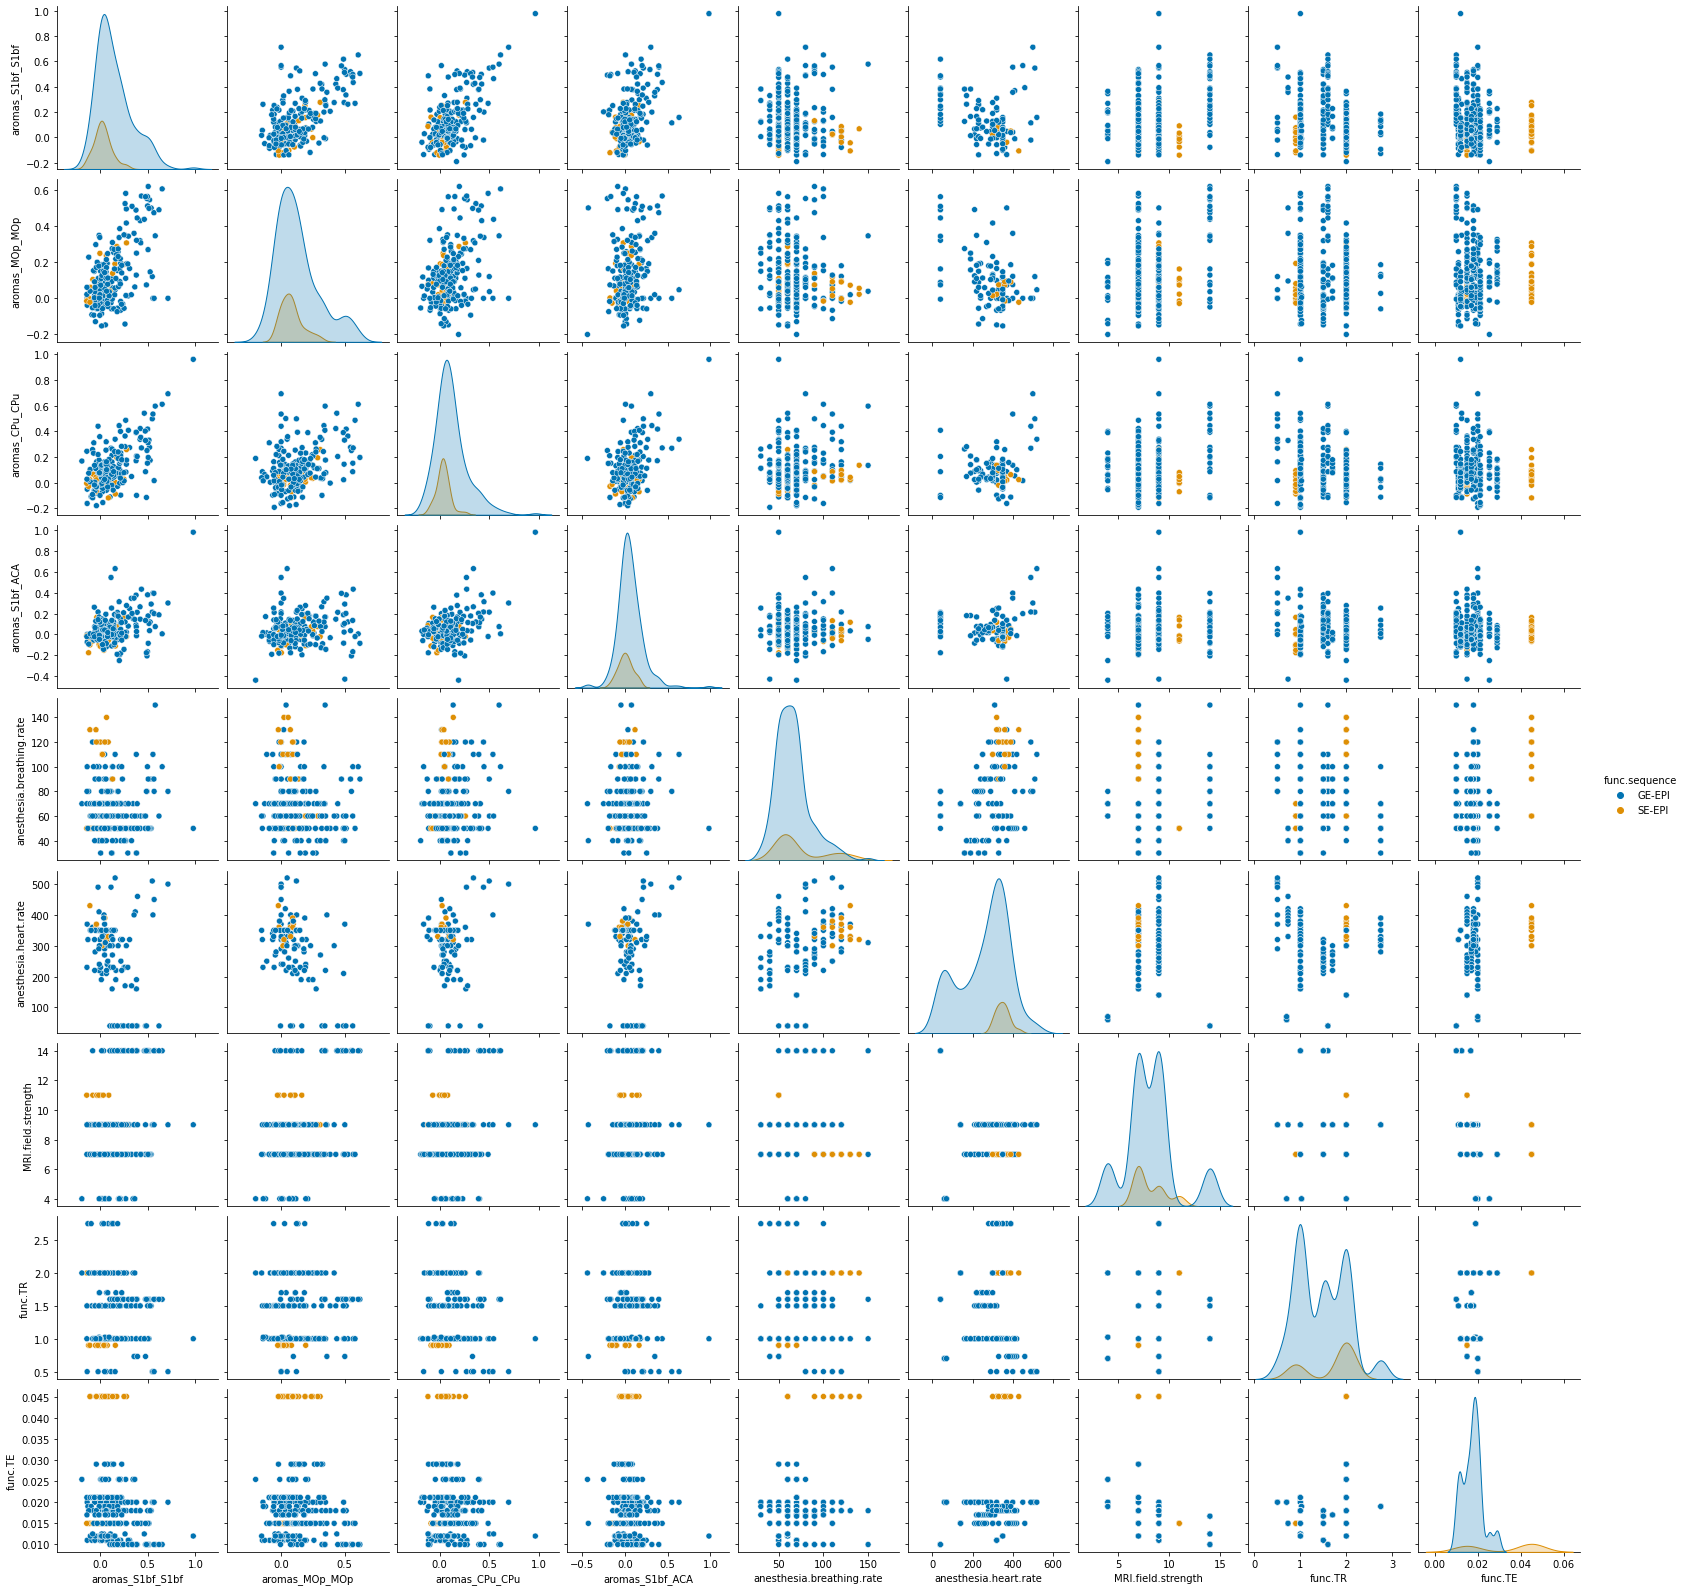

In [185]:
sns.pairplot(df_sub, hue="func.sequence")

In [ ]:
from scipy import stats
tt=2.3
n=12
pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))

In [179]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#because statsmodels doesn't like columns with dots. the stats were originally planned in R. :-( )
df_exclude.columns=df_exclude.columns.str.replace('[\.]', '')

# Full model
m01 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + MRIfieldstrength + funcsequence + funcTR + funcTE', data=df_exclude).fit()

print('testing for the effect of strain')
m02 = ols('aromas_S1bf_S1bf ~ anesthesiamaintenance + MRIfieldstrength + funcsequence + funcTR + funcTE', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of anesthesia maintenance')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain  + MRIfieldstrength + funcsequence + funcTR + funcTE', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of field strength')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + funcsequence + funcTR + funcTE', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of sequence')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + MRIfieldstrength + funcTR + funcTE', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of TR')
m02 = ols('aromas_S1bf_S1bf ~ MRIfieldstrength + funcsequence + funcTE', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of TE')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + MRIfieldstrength + funcsequence + funcTR', data=df_exclude).fit()
print(anova_lm(m02, m01))


<ipython-input-179-8a07a9ccf222>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_exclude.columns=df_exclude.columns.str.replace('[\.]', '')


testing for the effect of strain
   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     278.0  7.492612      0.0       NaN       NaN       NaN
1     275.0  7.334546      3.0  0.158066  1.975504  0.117895

testing for the effect of anesthesia maintenance
   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     280.0  7.716515      0.0       NaN       NaN       NaN
1     275.0  7.334546      5.0  0.381969  2.864297  0.015378

testing for the effect of field strength
   df_resid       ssr  df_diff   ss_diff          F        Pr(>F)
0     276.0  8.269761      0.0       NaN        NaN           NaN
1     275.0  7.334546      1.0  0.935216  35.064786  9.487912e-09

testing for the effect of sequence
   df_resid       ssr  df_diff   ss_diff          F    Pr(>F)
0     276.0  7.946818      0.0       NaN        NaN       NaN
1     275.0  7.334546      1.0  0.612272  22.956408  0.000003

testing for the effect of TR
   df_resid       ssr  df_diff   ss_diff         F    Pr(>F